Tahapan
1. Pembersihan awal ( tidak melakukan encoding atau imputasi)
2. Split Data (x dan y)
3. Eda Pada Train
4. Preprocessing
5. Modeling
6. Tuning
7. Visualisasi final

In [ ]:
import pandas as pd

# Load the dataset with tab separator
df = pd.read_csv('marketing_campaign.csv', sep='\t')
display(df.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# Print df.info()
print("\nDataFrame Info:")
df.info()

# Print total number of missing values for each column
print("\nMissing values per column:")
print(df.isnull().sum())

# Print the number of duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    

### Pembersihan Awal


Menghapus kolom ID karena tidak akan berpengaruh pada kolom lainnya dan agar model tidak membaca data yang tidak dibutuhkan

In [ ]:
# Drop the 'ID' column
df = df.drop('ID', axis=1)

# Convert 'Dt_Customer' to datetime objects with the correct format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Create 'Age' feature
df['Age'] = 2014 - df['Year_Birth']

# Drop the original 'Year_Birth' column
df = df.drop('Year_Birth', axis=1)

# Remove outliers where 'Age' is greater than 100
df = df[df['Age'] <= 100]

display(df.head())

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,...,0,0,0,0,0,0,3,11,1,57
1,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,...,0,0,0,0,0,0,3,11,0,60
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,...,0,0,0,0,0,0,3,11,0,49
3,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,...,0,0,0,0,0,0,3,11,0,30
4,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,...,0,0,0,0,0,0,3,11,0,33


### Inspection

Melihat hasil dari penghapusan kolom ID, serta melihat berapa banyak data yang sama atau duplikat

In [ ]:
# Print df.info()
print("\nDataFrame Info:")
df.info()

# Print total number of missing values for each column
print("\nMissing values per column:")
print(df.isnull().sum())

# Print the number of duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2237 non-null   object        
 1   Marital_Status       2237 non-null   object        
 2   Income               2213 non-null   float64       
 3   Kidhome              2237 non-null   int64         
 4   Teenhome             2237 non-null   int64         
 5   Dt_Customer          2237 non-null   datetime64[ns]
 6   Recency              2237 non-null   int64         
 7   MntWines             2237 non-null   int64         
 8   MntFruits            2237 non-null   int64         
 9   MntMeatProducts      2237 non-null   int64         
 10  MntFishProducts      2237 non-null   int64         
 11  MntSweetProducts     2237 non-null   int64         
 12  MntGoldProds         2237 non-null   int64         
 13  NumDealsPurchases    

Melihat Data yang duplikat dari dataset dimana data yang sama di bandingkan

In [ ]:
# Create a new DataFrame with all duplicate entries
duplicate_rows = df[df.duplicated(keep=False)]

# Sort the duplicate_rows by 'Recency' for easier comparison
duplicate_rows = duplicate_rows.sort_values(by='Recency').reset_index(drop=True)

# Display the first 10 rows of duplicate_rows
print("First 10 duplicate rows (sorted by 'Recency'):")
display(duplicate_rows.head(10))

# Print the total number of duplicate rows
print(f"\nTotal number of duplicate rows: {len(duplicate_rows)}")

First 10 duplicate rows (sorted by 'Recency'):


,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,PhD,Married,65324.0,0,1,2014-01-11,0,384,0,102,...,0,0,0,0,0,0,3,11,0,60
1,PhD,Married,65324.0,0,1,2014-01-11,0,384,0,102,...,0,0,0,0,0,0,3,11,0,60
2,Graduation,Together,54450.0,1,1,2012-09-14,0,454,0,171,...,0,0,0,0,0,0,3,11,0,58
3,Graduation,Together,54450.0,1,1,2012-09-14,0,454,0,171,...,0,0,0,0,0,0,3,11,0,58
4,Master,Married,58646.0,0,1,2013-06-10,3,62,1,44,...,0,0,0,0,0,0,3,11,0,52
5,Graduation,Together,68695.0,0,0,2014-06-25,3,458,81,356,...,0,0,0,0,0,0,3,11,0,45
6,Graduation,Together,68695.0,0,0,2014-06-25,3,458,81,356,...,0,0,0,0,0,0,3,11,0,45
7,Master,Married,58646.0,0,1,2013-06-10,3,62,1,44,...,0,0,0,0,0,0,3,11,0,52
8,Graduation,Married,33039.0,1,0,2013-09-09,4,30,8,12,...,0,0,0,0,0,0,3,11,0,36
9,Graduation,Married,33039.0,1,0,2013-09-09,4,30,8,12,...,0,0,0,0,0,0,3,11,0,36



Total number of duplicate rows: 358


Tahap Penghapusan Data duplikat tadi dan pembagian data menjadi 2 ya itu X dan Y

In [ ]:
from sklearn.model_selection import train_test_split

# Remove duplicate rows
df.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {len(df)}")

# Define features (X) and target (y)
X = df.drop('Response', axis=1)
y = df['Response']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the shape of X_train and X_test to confirm the split
print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Number of rows after removing duplicates: 2055

Shape of X_train: (1644, 27)
Shape of X_test: (411, 27)


melihat data xtrain dari pembagian tadi yang di mana test 20% dan train 80%

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Concatenate X_train and y_train into a new DataFrame called df_train
df_train = pd.concat([X_train, y_train], axis=1)

print("df_train head:")
display(df_train.head())
print("\ndf_train info:")
df_train.info()

df_train head:


,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Age,Response
1812,Master,Married,79734.0,0,0,2014-06-28,72,572,8,232,...,0,0,0,1,0,0,3,11,45,0
477,Master,Married,55842.0,0,1,2014-05-23,19,451,0,39,...,0,0,0,0,0,0,3,11,37,0
858,Graduation,Together,37758.0,1,1,2012-10-04,49,27,2,10,...,0,0,0,0,0,0,3,11,48,0
110,Graduation,Together,77298.0,0,1,2013-11-02,46,425,115,292,...,0,0,0,0,0,0,3,11,35,0
902,Graduation,Together,66825.0,0,0,2013-07-14,73,243,101,405,...,0,0,0,0,0,0,3,11,47,0



df_train info:
<class 'pandas.core.frame.DataFrame'>
Index: 1644 entries, 1812 to 2121
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            1644 non-null   object        
 1   Marital_Status       1644 non-null   object        
 2   Income               1621 non-null   float64       
 3   Kidhome              1644 non-null   int64         
 4   Teenhome             1644 non-null   int64         
 5   Dt_Customer          1644 non-null   datetime64[ns]
 6   Recency              1644 non-null   int64         
 7   MntWines             1644 non-null   int64         
 8   MntFruits            1644 non-null   int64         
 9   MntMeatProducts      1644 non-null   int64         
 10  MntFishProducts      1644 non-null   int64         
 11  MntSweetProducts     1644 non-null   int64         
 12  MntGoldProds         1644 non-null   int64         
 13  NumDealsPurchases  

### Plot 1: Target Balance (Countplot of 'Response')

Melihat perbandingan data target ya itu respon dimana terdapat 2 kategori ya itu merespon dan tidak merespon

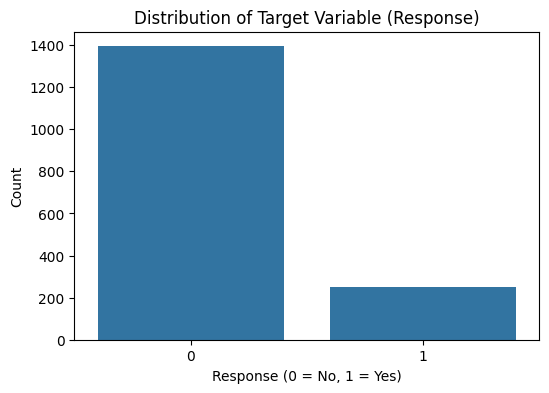

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Response', data=df_train)
plt.title('Distribution of Target Variable (Response)')
plt.xlabel('Response (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

### Plot 2: Numerical Distribution (Histogram of 'Income' with KDE)

Melihat besarnya gaji dan banyaknya orang yang memiliki gaji tersebut

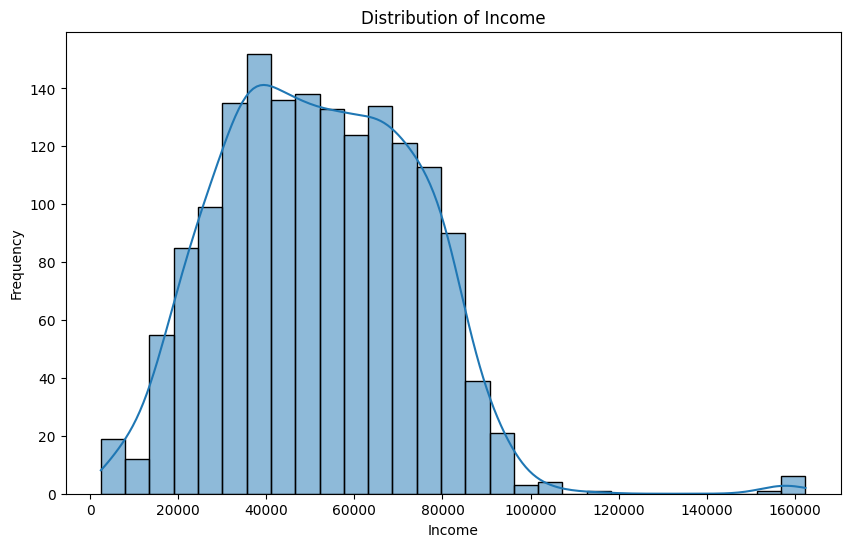

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Income'].dropna(), kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

### Plot 3: Feature Correlation (Heatmap for numerical features)

Melihat kolerasi antar feature untuk melihat feature manakah yang memiliki kolerasi yang besar

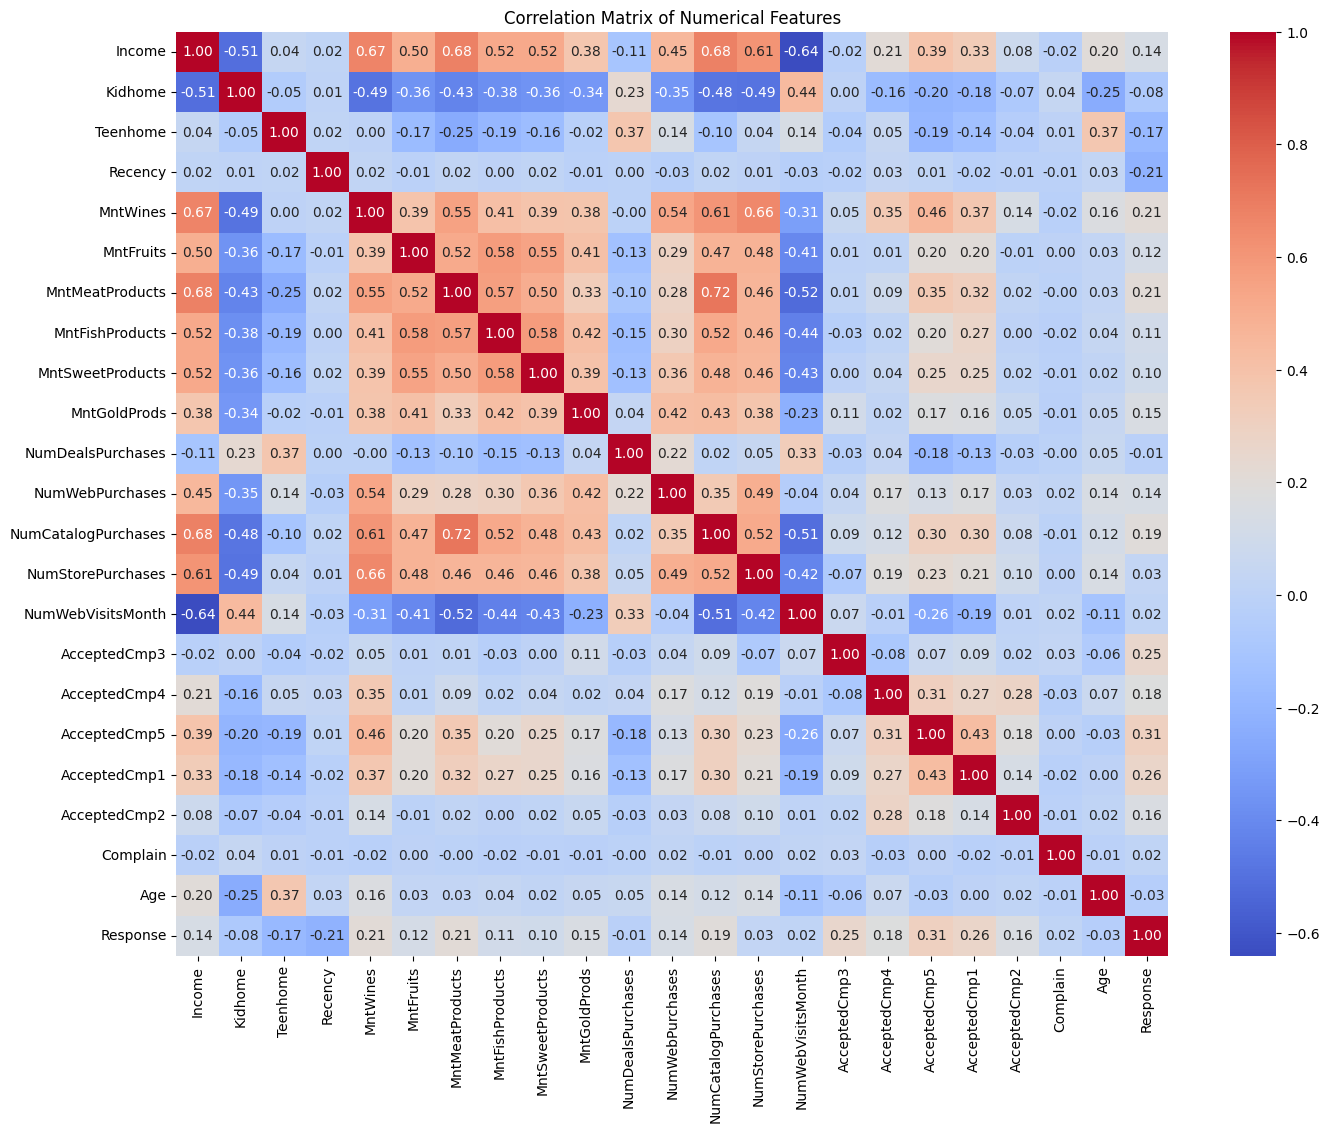

In [ ]:
plt.figure(figsize=(16, 12))
# Select only numerical columns for correlation matrix
numerical_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
# Exclude Z_CostContact and Z_Revenue as they appear to be constant and not useful
numerical_cols = [col for col in numerical_cols if col not in ['Z_CostContact', 'Z_Revenue']]
corr_matrix = df_train[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Plot 4: Bivariate Analysis (Boxplot of 'Income' vs. 'Response')

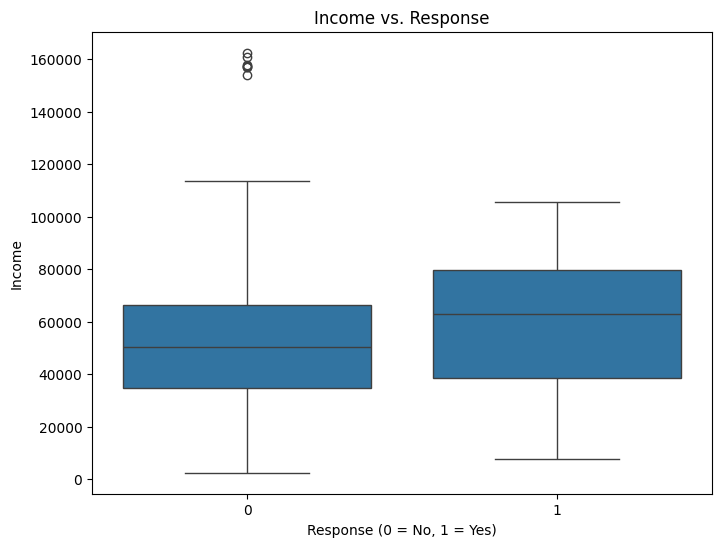

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Response', y='Income', data=df_train)
plt.title('Income vs. Response')
plt.xlabel('Response (0 = No, 1 = Yes)')
plt.ylabel('Income')
plt.show()

### Plot 5: Categorical Analysis (Countplot of 'Education' grouped by 'Response')

Melihat kategori yang memilih respon atau tidak merespon memiliki background pendidikan seperti apa

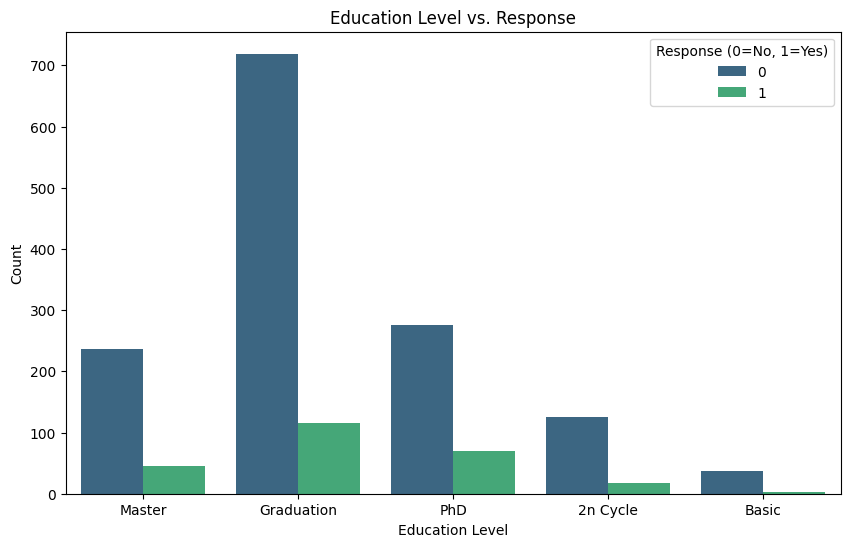

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Response', data=df_train, palette='viridis')
plt.title('Education Level vs. Response')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Response (0=No, 1=Yes)')
plt.show()

Melakukan Preprocessing, namun menghapus kolom Dt_Customer terlebih dahulu

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Drop 'Dt_Customer' column from X_train and X_test
X_train = X_train.drop('Dt_Customer', axis=1)
X_test = X_test.drop('Dt_Customer', axis=1)

# Re-identify numerical and categorical columns after dropping 'Dt_Customer'
numerical_cols = X_train.select_dtypes(include=np.number).columns
categorical_cols = X_train.select_dtypes(include='object').columns

print(f"Numerical columns: {list(numerical_cols)}")
print(f"Categorical columns: {list(categorical_cols)}")

# Create numerical pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Create categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='drop' # Explicitly drop any other columns not specified
)

# Fit the preprocessor on X_train and transform X_train
X_train_pre = preprocessor.fit_transform(X_train)

# Transform X_test using the already fitted preprocessor
X_test_pre = preprocessor.transform(X_test)

# Verification: Print the shape of X_train_pre and X_test_pre
print(f"\nShape of X_train_pre: {X_train_pre.shape}")
print(f"Shape of X_test_pre: {X_test_pre.shape}")

# Display the first 3 rows of X_train_pre
print("\nFirst 3 rows of X_train_pre (as array):")
display(X_train_pre[:3])

Numerical columns: ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Age']
Categorical columns: ['Education', 'Marital_Status']

Shape of X_train_pre: (1644, 37)
Shape of X_test_pre: (411, 37)

First 3 rows of X_train_pre (as array):


array([[ 1.27767559e+00, -8.35804354e-01, -9.30249862e-01,
         7.96358140e-01,  8.13696299e-01, -4.61401465e-01,
         2.81965528e-01, -2.61274436e-01,  8.56615227e-01,
        -5.12734405e-01, -7.01613323e-01, -4.17730727e-02,
         1.19812318e-01,  6.49273897e-02, -1.79611768e+00,
        -2.79343493e-01, -2.96683633e-01, -2.75529001e-01,
         3.71628993e+00, -1.02218778e-01, -8.92780499e-02,
         0.00000000e+00,  0.00000000e+00,  5.97009048e-03,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.75712949e-01, -8.35804354e-01,  9.03480081e-01,
        -1.03268152e+00,  4.50618480e-01, -6.63922894e-01,
        -5.60149009e-01, -6.79623323e-01, -5.55238525e-01,
        -3.74929100e-01, -7.01613323e-01,  1.02571291e+00,
        -5.58230542e-01,  6.76

Pada tahap ini adalah modeling dimana menggunakan 2 model utama ya itu Decision Tree dan Random Forest

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Define Models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

print("--- Decision Tree Model ---")
# Train Decision Tree Model
dt_model.fit(X_train_pre, y_train)
# Predict on X_test_pre
y_pred_dt = dt_model.predict(X_test_pre)
# Print Classification Report
print("Classification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt))

print("\n--- Random Forest Model ---")
# Train Random Forest Model
rf_model.fit(X_train_pre, y_train)
# Predict on X_test_pre
y_pred_rf = rf_model.predict(X_test_pre)
# Print Classification Report
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))

--- Decision Tree Model ---
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       348
           1       0.35      0.40      0.37        63

    accuracy                           0.80       411
   macro avg       0.62      0.63      0.63       411
weighted avg       0.81      0.80      0.80       411


--- Random Forest Model ---
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       348
           1       0.65      0.27      0.38        63

    accuracy                           0.87       411
   macro avg       0.77      0.62      0.65       411
weighted avg       0.85      0.87      0.84       411



### Visualize Learning Curves

Melihat hasil dari model sebelumnya menggunakan Learning Curve

In [ ]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs. fit times curve, and the fit times vs. score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features),
        Target vector as relative to X.

    axes : array-like of shape (3,), optional
        Axes to use for plotting the curves. Defaults to creating new axes.

    ylim : tuple, shape (2,), optional
        Defines limits for the y-axis.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`, An object to be used as a cross-validation
            strategy.
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multi-label, uses a
        stratified k-fold. In all other cases, uses k-fold.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel. (`-1` means using all processors)

    train_sizes : array-like, shape (n_ticks, ), optional
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve.

    scoring : string or callable, optional (default='accuracy')
        A string (see model evaluation documentation) or a scorer callable
        object / function with signature ``scorer(estimator, X, y)``.

    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes, scoring=scoring,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

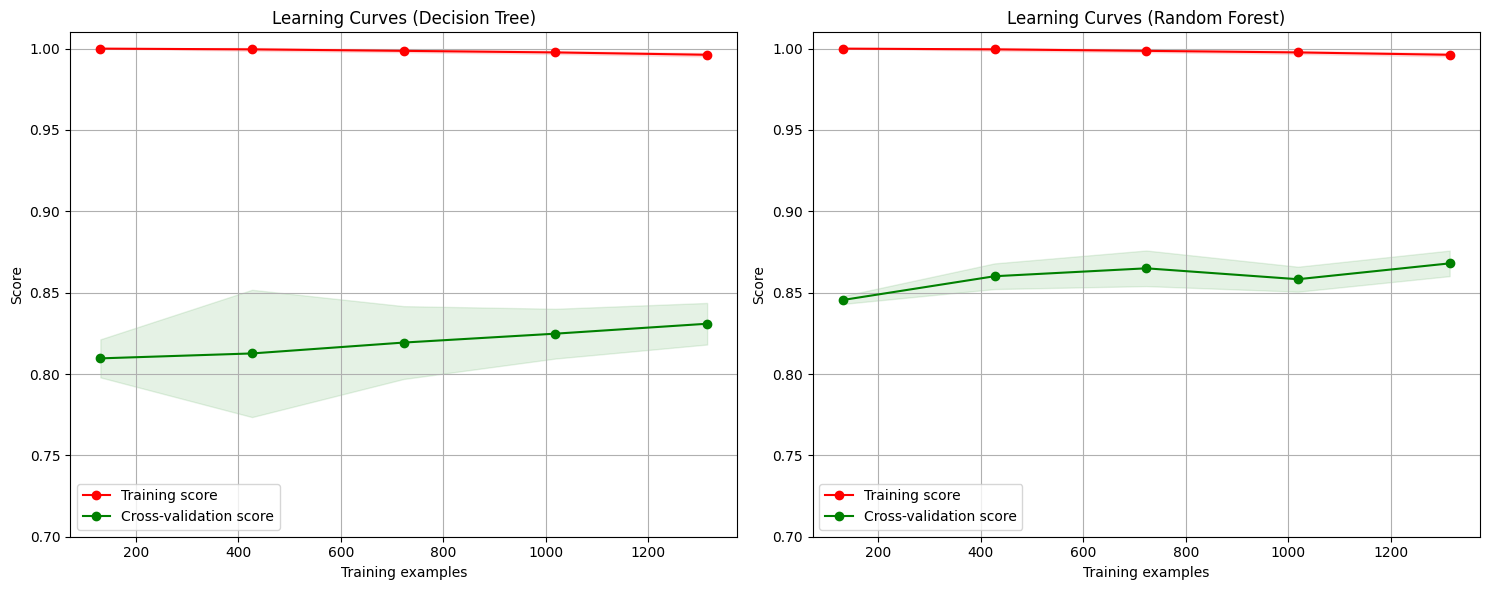

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Decision Tree Learning Curve
plot_learning_curve(dt_model, "Learning Curves (Decision Tree)", X_train_pre, y_train,
                    axes=axes[0], ylim=(0.7, 1.01), cv=5, n_jobs=-1, scoring='accuracy')

# Random Forest Learning Curve
plot_learning_curve(rf_model, "Learning Curves (Random Forest)", X_train_pre, y_train,
                    axes=axes[1], ylim=(0.7, 1.01), cv=5, n_jobs=-1, scoring='accuracy')

plt.tight_layout()
plt.show()

###6. Tunning

Melakukan tuning atau perbaikan dalam model menggunakan GridSearchCV pada setiap model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define Parameter Grids

# Decision Tree Grid
dt_param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Random Forest Grid
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [2, 5]
}

print("--- Hyperparameter Tuning: Decision Tree ---")
# Setup GridSearchCV for Decision Tree
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# Fit on X_train_pre and y_train
dt_grid_search.fit(X_train_pre, y_train)

# Retrieve Best Decision Tree Model and Parameters
best_dt_model = dt_grid_search.best_estimator_
print("Best Decision Tree Parameters:", dt_grid_search.best_params_)

print("\n--- Hyperparameter Tuning: Random Forest ---")
# Setup GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# Fit on X_train_pre and y_train
rf_grid_search.fit(X_train_pre, y_train)

# Retrieve Best Random Forest Model and Parameters
best_rf_model = rf_grid_search.best_estimator_
print("Best Random Forest Parameters:", rf_grid_search.best_params_)

--- Hyperparameter Tuning: Decision Tree ---
Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1}

--- Hyperparameter Tuning: Random Forest ---
Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 50}


### Visualize Learning Curves for Optimized Models

Hasil dari tunign atau perbaikan model

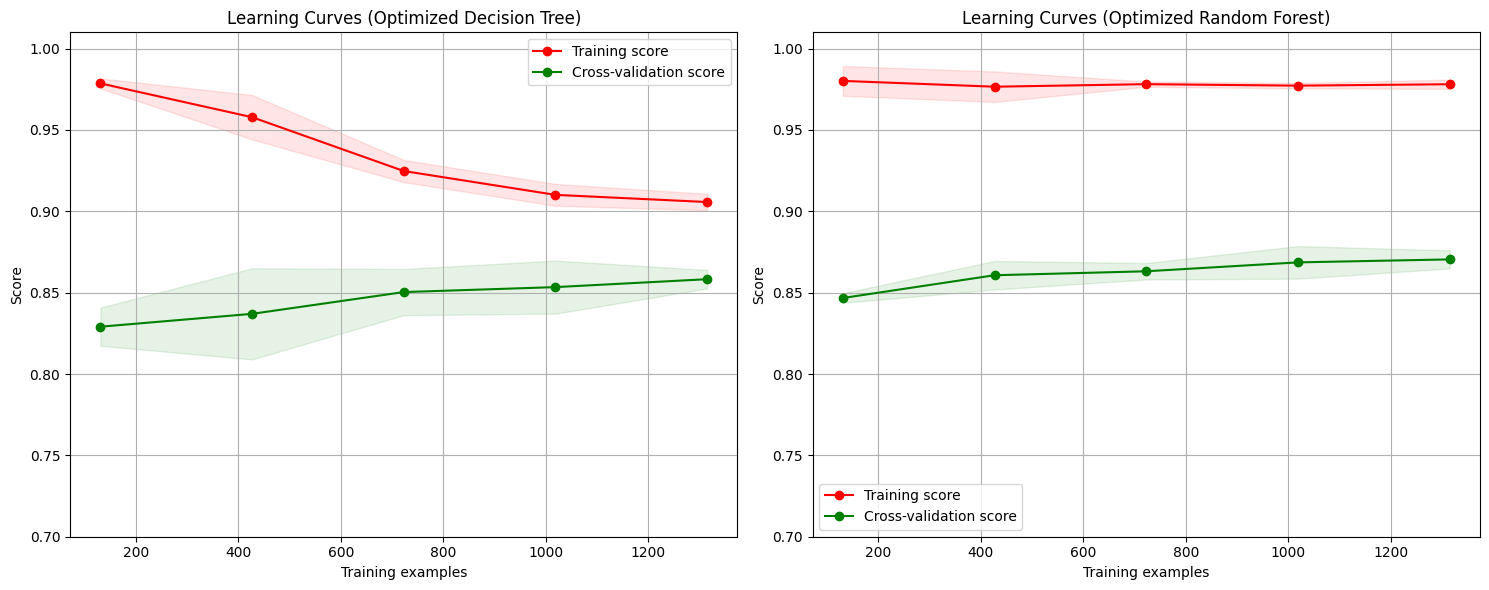

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Optimized Decision Tree Learning Curve
plot_learning_curve(best_dt_model, "Learning Curves (Optimized Decision Tree)", X_train_pre, y_train,
                    axes=axes[0], ylim=(0.7, 1.01), cv=5, n_jobs=-1, scoring='accuracy')

# Optimized Random Forest Learning Curve
plot_learning_curve(best_rf_model, "Learning Curves (Optimized Random Forest)", X_train_pre, y_train,
                    axes=axes[1], ylim=(0.7, 1.01), cv=5, n_jobs=-1, scoring='accuracy')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions and probabilities for optimized Decision Tree
y_pred_dt_opt = best_dt_model.predict(X_test_pre)
y_proba_dt_opt = best_dt_model.predict_proba(X_test_pre)[:, 1]

# Get predictions and probabilities for optimized Random Forest
y_pred_rf_opt = best_rf_model.predict(X_test_pre)
y_proba_rf_opt = best_rf_model.predict_proba(X_test_pre)[:, 1]

print("Predictions and probabilities generated for optimized models.")

Predictions and probabilities generated for optimized models.


### Visualization A: Confusion Matrices

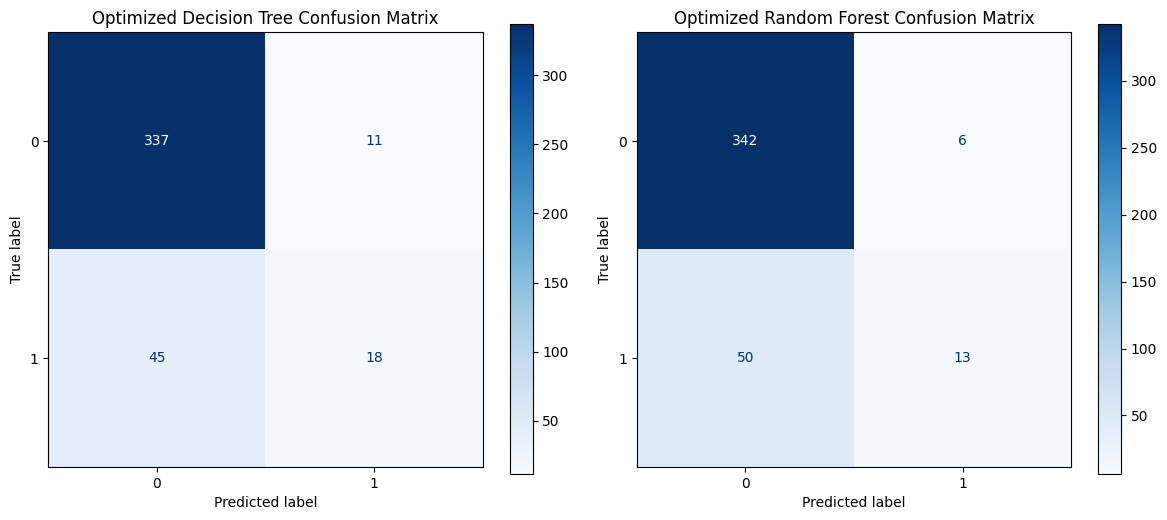

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix for Optimized Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt_opt)
ConfusionMatrixDisplay(cm_dt, display_labels=[0, 1]).plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Optimized Decision Tree Confusion Matrix')

# Confusion Matrix for Optimized Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf_opt)
ConfusionMatrixDisplay(cm_rf, display_labels=[0, 1]).plot(ax=axes[1], cmap='Blues')
axes[1].set_title('Optimized Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()

### Visualization B: ROC Curve Comparison

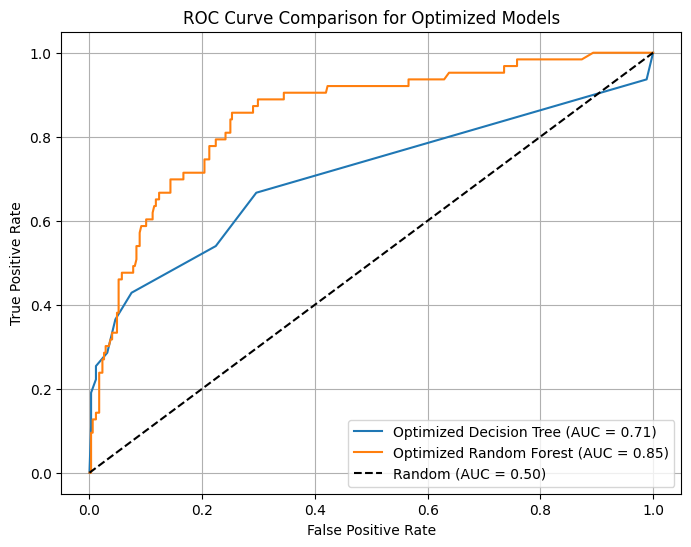

In [ ]:
plt.figure(figsize=(8, 6))

# ROC Curve for Optimized Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt_opt)
auc_dt = roc_auc_score(y_test, y_proba_dt_opt)
plt.plot(fpr_dt, tpr_dt, label=f'Optimized Decision Tree (AUC = {auc_dt:.2f})')

# ROC Curve for Optimized Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf_opt)
auc_rf = roc_auc_score(y_test, y_proba_rf_opt)
plt.plot(fpr_rf, tpr_rf, label=f'Optimized Random Forest (AUC = {auc_rf:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Optimized Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Visualization C: Feature Importance (Optimized Random Forest)

/tmp/ipython-input-2343661514.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top_10_features, palette='viridis')


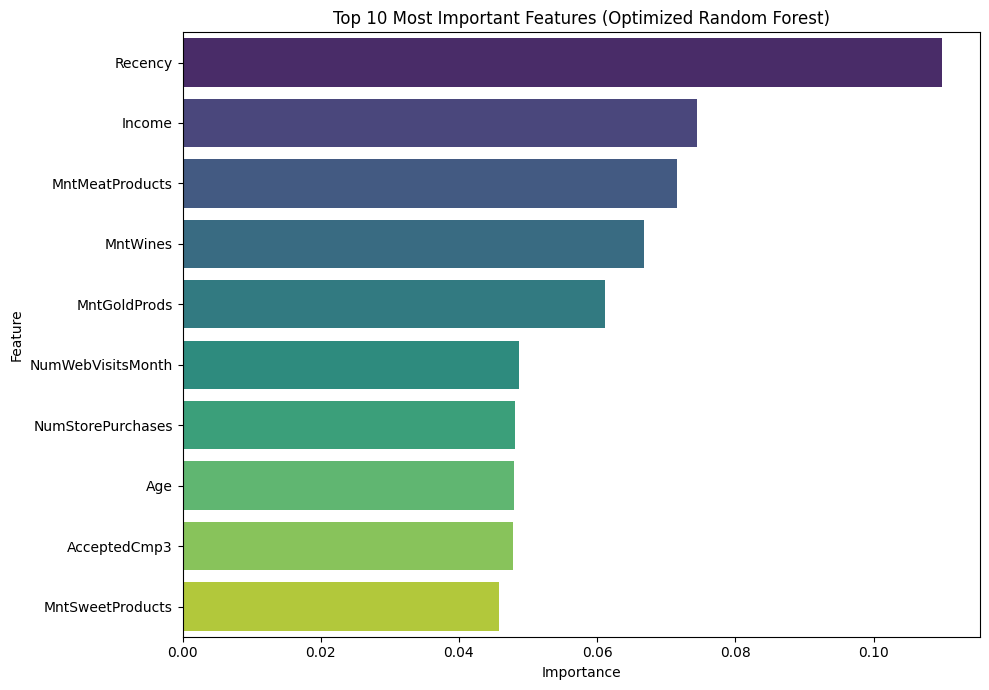

In [ ]:
# Get feature names from the preprocessor
numerical_features = preprocessor.named_transformers_['num'].get_feature_names_out(numerical_cols)
categorical_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

all_feature_names = list(numerical_features) + list(categorical_features)

# Get feature importances from the best Random Forest model
importances = best_rf_model.feature_importances_

# Create a DataFrame for better handling
feature_importance_df = pd.DataFrame({
    'feature': all_feature_names,
    'importance': importances
})

# Sort by importance and get the top 10
top_10_features = feature_importance_df.sort_values(by='importance', ascending=False).head(10)

plt.figure(figsize=(10, 7))
sns.barplot(x='importance', y='feature', data=top_10_features, palette='viridis')
plt.title('Top 10 Most Important Features (Optimized Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Text Summary: Final Classification Reports

In [ ]:
print("--- Final Classification Report for Optimized Decision Tree ---")
print(classification_report(y_test, y_pred_dt_opt))

print("\n--- Final Classification Report for Optimized Random Forest ---")
print(classification_report(y_test, y_pred_rf_opt))

--- Final Classification Report for Optimized Decision Tree ---
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       348
           1       0.62      0.29      0.39        63

    accuracy                           0.86       411
   macro avg       0.75      0.63      0.66       411
weighted avg       0.84      0.86      0.84       411


--- Final Classification Report for Optimized Random Forest ---
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       348
           1       0.68      0.21      0.32        63

    accuracy                           0.86       411
   macro avg       0.78      0.59      0.62       411
weighted avg       0.84      0.86      0.83       411



In [ ]:
# --- CELL 1: SIMPAN MODEL KE FILE ---
import pickle
import os

# Save the preprocessor
try:
    with open('preprocessor.pkl', 'wb') as f:
        pickle.dump(preprocessor, f)

    # Save the best Decision Tree model
    with open('model_dt.pkl', 'wb') as f:
        pickle.dump(best_dt_model, f)

    # Save the best Random Forest model
    with open('model_rf.pkl', 'wb') as f:
        pickle.dump(best_rf_model, f)

    print("✅ Berhasil menyimpan preprocessor.pkl, model_dt.pkl, dan model_rf.pkl.")
    print("Files in directory:", os.listdir('.'))

except NameError:
    print("❌ Error: Variabel model belum ditemukan. Pastikan Anda sudah menjalankan proses training (fit) sebelumnya.")

✅ Berhasil menyimpan preprocessor.pkl, model_dt.pkl, dan model_rf.pkl.
Files in directory: ['.config', 'preprocessor.pkl', 'marketing_campaign.csv', '.ipynb_checkpoints', 'model_rf.pkl', 'model_dt.pkl', 'sample_data']


In [ ]:
# --- CELL 2: INSTALASI & BUAT FILE APP.PY ---

# 1. Instal Streamlit & Perbaiki Error NPM
print("Sedang menginstal library...")
!pip install -q streamlit
!npm install -g localtunnel --force
print("Instalasi selesai.")

# 2. Tulis file app.py
print("Sedang membuat file app.py...")

Sedang menginstal library...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 84.4 MB/s eta 0:00:00
npm warn using --force Recommended protections disabled.
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸
added 22 packages in 1s
⠸
⠸3 packages are looking for funding
⠸  run `npm fund` for details
⠸Instalasi selesai.
Sedang membuat file app.py...


In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import pickle
import numpy as np
import os

# --- 1. Load Assets (Preprocessor and Models) ---
@st.cache_resource
def load_assets():
    try:
        with open('preprocessor.pkl', 'rb') as f:
            preprocessor = pickle.load(f)
        with open('model_dt.pkl', 'rb') as f:
            model_dt = pickle.load(f)
        with open('model_rf.pkl', 'rb') as f:
            model_rf = pickle.load(f)
        return preprocessor, model_dt, model_rf
    except FileNotFoundError:
        st.error("Error: Model or preprocessor files not found. Please ensure 'preprocessor.pkl', 'model_dt.pkl', and 'model_rf.pkl' are in the same directory.")
        st.stop()

preprocessor, model_dt, model_rf = load_assets()

# --- Streamlit App Configuration ---
st.set_page_config(page_title="Marketing Campaign Prediction", layout="centered")

# --- Sidebar Configuration ---
st.sidebar.title("Marketing Campaign Prediction")
selected_model = st.sidebar.selectbox(
    "Choose your model:",
    ('Random Forest', 'Decision Tree')
)

st.sidebar.markdown("--- Say Hi to your customers! --- ")

# --- Main Application Layout ---
st.title("Customer Response Prediction for Marketing Campaigns")
st.markdown("Fill in the customer's details to predict their likelihood of responding to a marketing campaign.")

# --- User Inputs ---
feature_order = [
    'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
    'Z_CostContact', 'Z_Revenue', 'Age'
]

input_data = {}

with st.expander("### Customer Profile", expanded=True):
    col1, col2 = st.columns(2)
    with col1:
        input_data['Age'] = st.number_input('Age', min_value=18, max_value=100, value=40)
        input_data['Education'] = st.selectbox(
            'Education Level',
            ('Graduation', 'PhD', 'Master', '2n Cycle', 'Basic'),
            index=0
        )
        input_data['Marital_Status'] = st.selectbox(
            'Marital Status',
            ('Married', 'Single', 'Together', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'),
            index=0
        )
    with col2:
        input_data['Income'] = st.number_input('Income', min_value=0.0, value=50000.0, step=1000.0)
        input_data['Kidhome'] = st.number_input('Number of Kids at Home', min_value=0, max_value=2, value=0)
        input_data['Teenhome'] = st.number_input('Number of Teens at Home', min_value=0, max_value=2, value=0)

with st.expander("### Spending Habits (Last 2 Years)", expanded=True):
    col1, col2, col3 = st.columns(3)
    with col1:
        input_data['MntWines'] = st.number_input('Amount spent on Wines', min_value=0, value=300)
        input_data['MntFruits'] = st.number_input('Amount spent on Fruits', min_value=0, value=20)
    with col2:
        input_data['MntMeatProducts'] = st.number_input('Amount spent on Meat Products', min_value=0, value=150)
        input_data['MntFishProducts'] = st.number_input('Amount spent on Fish Products', min_value=0, value=25)
    with col3:
        input_data['MntSweetProducts'] = st.number_input('Amount spent on Sweet Products', min_value=0, value=20)
        input_data['MntGoldProds'] = st.number_input('Amount spent on Gold Products', min_value=0, value=50)

with st.expander("### Activity & Interaction", expanded=True):
    col1, col2 = st.columns(2)
    with col1:
        input_data['Recency'] = st.number_input('Days since Last Purchase', min_value=0, max_value=99, value=30)
        input_data['NumDealsPurchases'] = st.number_input('Number of Purchases with Discount', min_value=0, value=1)
        input_data['NumWebPurchases'] = st.number_input('Number of Web Purchases', min_value=0, value=3)
    with col2:
        input_data['NumCatalogPurchases'] = st.number_input('Number of Catalog Purchases', min_value=0, value=1)
        input_data['NumStorePurchases'] = st.number_input('Number of Store Purchases', min_value=0, value=4)
        input_data['NumWebVisitsMonth'] = st.number_input('Number of Web Visits (Last Month)', min_value=0, value=5)

with st.expander("### Campaign History & Other", expanded=False):
    col1, col2, col3 = st.columns(3)
    with col1:
        input_data['AcceptedCmp1'] = st.selectbox('Accepted Campaign 1', (0, 1), index=0)
        input_data['AcceptedCmp2'] = st.selectbox('Accepted Campaign 2', (0, 1), index=0)
        input_data['AcceptedCmp3'] = st.selectbox('Accepted Campaign 3', (0, 1), index=0)
    with col2:
        input_data['AcceptedCmp4'] = st.selectbox('Accepted Campaign 4', (0, 1), index=0)
        input_data['AcceptedCmp5'] = st.selectbox('Accepted Campaign 5', (0, 1), index=0)
        input_data['Complain'] = st.selectbox('Customer complained in last 2 years', (0, 1), index=0)
    with col3:
        input_data['Z_CostContact'] = st.number_input('Z_CostContact (Fixed)', value=3, disabled=True)
        input_data['Z_Revenue'] = st.number_input('Z_Revenue (Fixed)', value=11, disabled=True)

# --- Prediction Logic ---
if st.button('Predict Customer Response'):
    input_df = pd.DataFrame([input_data])[feature_order]
    processed_input = preprocessor.transform(input_df)

    if selected_model == 'Decision Tree':
        model = model_dt
    else:
        model = model_rf

    prediction = model.predict(processed_input)
    prediction_proba = model.predict_proba(processed_input)

    st.markdown("### Prediction Result")
    if prediction[0] == 1:
        st.success(f"This customer is likely to respond! (Prob: {prediction_proba[0, 1]:.2f})")
        st.balloons()
    else:
        st.warning(f"This customer is NOT likely to respond. (Prob: {prediction_proba[0, 1]:.2f} for response)")

Writing app.py


In [ ]:
# --- CELL 3: JALANKAN APLIKASI ---
import urllib

# 1. Ambil Password IP
print("--------------------------------------------------")
print("Password untuk Tunnel:", urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))
print("--------------------------------------------------")

# 2. Jalankan Streamlit di Background
# Log disimpan ke logs.txt agar tidak mengganggu output
!streamlit run app.py &>/content/logs.txt &

# 3. Jalankan LocalTunnel
print("Klik link 'your-url.loca.lt' di bawah ini, lalu masukkan Password di atas:")
!npx localtunnel --port 8501

--------------------------------------------------
Password untuk Tunnel: 35.187.236.147
--------------------------------------------------
Klik link 'your-url.loca.lt' di bawah ini, lalu masukkan Password di atas:
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴your url is: https://eager-rooms-tease.loca.lt
^C
